In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
def rate_from_price(data):
    T = len(data)
    return_rate = np.zeros(T - 1)

    for t in range(1, T):
        rate_t = (data[t] - data[t-1]) / data[t]
        return_rate[t - 1] = rate_t

    return return_rate

In [4]:
# Data from Apr 6 2023 - Apr 6 2024
data_path = '/content/drive/MyDrive/nifty'
data_files = os.listdir(data_path)

data = {}
min_time = 500

for data_file in data_files:
    data_file_path = data_path + '/' + data_file
    data[data_file] = rate_from_price(pd.read_csv(data_file_path).dropna()['Close '].to_numpy())

    min_time = min(min_time, len(data[data_file]))

for data_file in data_files:
    data[data_file] = data[data_file][len(data[data_file]) - min_time:]

T = min_time

In [5]:
np.random.seed(123)
risk_free_rate = 0.07117 # As of Apr 6th 2024

premium = data["market.csv"] - risk_free_rate
smb = data["small_cap.csv"] - data["large_cap.csv"]
hml = data["high_bm.csv"] - data["low_bm.csv"]
error = np.random.normal(size=T)

X = np.vstack((premium, smb, hml, error)).T

In [6]:
'''
Nimisha, please do the following:
- Get any stock, and the latest T values (T is defined in the code already).
If you have a stock close price array S, then the latest T values can be gotten by
S[len(S) - T:]
- Do S = S - risk_free_rate
- Perform Linear Regression with S as predicted and and X as decisions. Do it
with only part of the data, say first 200 (T = 256).
- Make a plot with S that is true, and S that is predicted.
- Package over.
- Lmk if you need help with anything.
'''

'\nNimisha, please do the following:\n- Get any stock, and the latest T values (T is defined in the code already).\nIf you have a stock close price array S, then the latest T values can be gotten by\nS[len(S) - T:]\n- Do S = S - risk_free_rate\n- Perform Linear Regression with S as predicted and and X as decisions. Do it\nwith only part of the data, say first 200 (T = 256).\n- Make a plot with S that is true, and S that is predicted.\n- Package over.\n- Lmk if you need help with anything.\n'

In [7]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [8]:
# Load the data for any stock
stock_file = '/content/reliance industries pvt ltd.csv'
stock_data = pd.read_csv(stock_file)
stock_prices = stock_data['Close Price'].to_numpy()

In [9]:
# Get the latest T values
S = stock_prices[len(stock_prices) - T:]

In [10]:
# Subtract the risk-free rate
S_adj = S - risk_free_rate

In [11]:
# Use the first 200 values for Linear Regression
X_train = X[:200]
S_train = S_adj[:200]

In [12]:
# Perform Linear Regression
model = LinearRegression()
model.fit(X_train, S_train.reshape(-1, 1))

LinearRegression()

In [13]:
# Predict the stock prices
S_pred = model.predict(X)

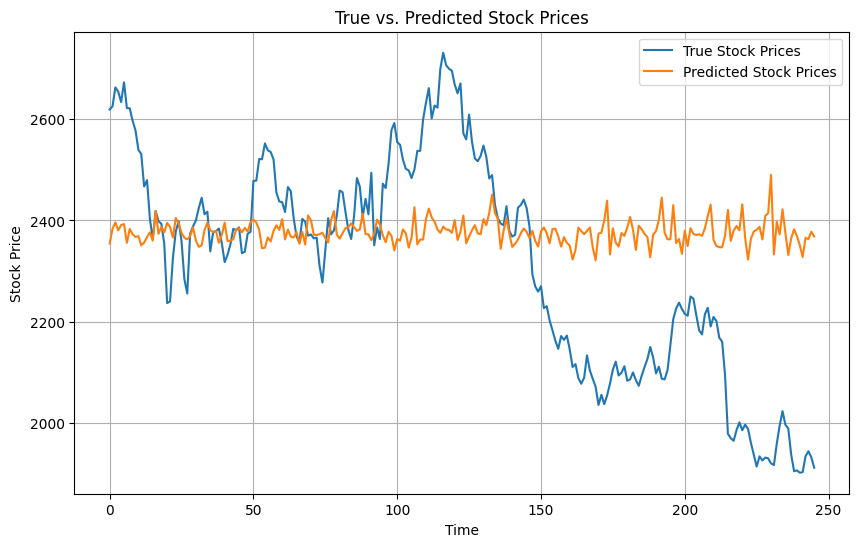

In [14]:
# Make a plot
plt.figure(figsize=(10, 6))
plt.plot(S, label='True Stock Prices')
plt.plot(S_pred, label='Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('True vs. Predicted Stock Prices')
plt.legend()
plt.grid(True)
plt.show()